<a href="https://colab.research.google.com/github/Naditya206/Machine-Learning/blob/main/TG5_244107023008_NADITYA_PRASTIA_ANDINO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS

1. Pilih salah satu dataset nyata dari sklearn.datasets (misalnya iris dataset atau digits dataset).
2. Lakukan clustering dengan HDBSCAN.
3. Laporkan hasil:
    - Jumlah cluster yang terbentuk.
    - Banyaknya noise.
    - Visualisasi (gunakan PCA/TSNE untuk reduksi dimensi jika perlu).
4. Buat analisis singkat: apakah hasil clustering HDBSCAN sesuai dengan label asli dataset tersebut?

In [16]:
# TUGAS - Clustering Dataset Iris dengan HDBSCAN

# Import pustaka yang diperlukan
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import pandas as pd

# 1. Load dataset Iris
print("=== LOADING DATASET IRIS ===")
iris = load_iris()
X_iris = iris.data
y_true = iris.target

print(f"Ukuran dataset: {X_iris.shape}")
print(f"Jumlah fitur: {X_iris.shape[1]}")
print(f"Jumlah sampel: {X_iris.shape[0]}")
print(f"Jumlah kelas asli: {len(set(y_true))}")
print(f"Nama fitur: {iris.feature_names}")
print(f"Nama kelas: {iris.target_names}")

# Tampilkan beberapa data pertama
df_iris = pd.DataFrame(X_iris, columns=iris.feature_names)
df_iris['true_label'] = y_true
print("\nBeberapa data pertama:")
print(df_iris.head())

=== LOADING DATASET IRIS ===
Ukuran dataset: (150, 4)
Jumlah fitur: 4
Jumlah sampel: 150
Jumlah kelas asli: 3
Nama fitur: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Nama kelas: ['setosa' 'versicolor' 'virginica']

Beberapa data pertama:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   true_label  
0           0  
1           0  
2           0  
3           0  
4           0  


In [17]:
# 2. Clustering dengan HDBSCAN
print("\n=== CLUSTERING DENGAN HDBSCAN ===")

# Terapkan HDBSCAN dengan beberapa parameter yang berbeda
hdb_iris = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=3)
cluster_labels = hdb_iris.fit_predict(X_iris)

print(f"Jumlah cluster yang terbentuk: {len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)}")
print(f"Jumlah noise points: {list(cluster_labels).count(-1)}")
print(f"Distribusi cluster:")

# Hitung distribusi untuk setiap cluster
unique_labels, counts = np.unique(cluster_labels, return_counts=True)
for label, count in zip(unique_labels, counts):
    if label == -1:
        print(f"  Noise: {count} points")
    else:
        print(f"  Cluster {label}: {count} points")

# Hitung probability untuk setiap point
probabilities = hdb_iris.probabilities_
print(f"\nRata-rata probability: {np.mean(probabilities):.3f}")
print(f"Minimum probability: {np.min(probabilities):.3f}")
print(f"Maximum probability: {np.max(probabilities):.3f}")


=== CLUSTERING DENGAN HDBSCAN ===
Jumlah cluster yang terbentuk: 2
Jumlah noise points: 0
Distribusi cluster:
  Cluster 0: 50 points
  Cluster 1: 100 points

Rata-rata probability: 0.886
Minimum probability: 0.319
Maximum probability: 1.000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



=== VISUALISASI HASIL CLUSTERING ===
Variance explained oleh 2 komponen PCA: 0.978


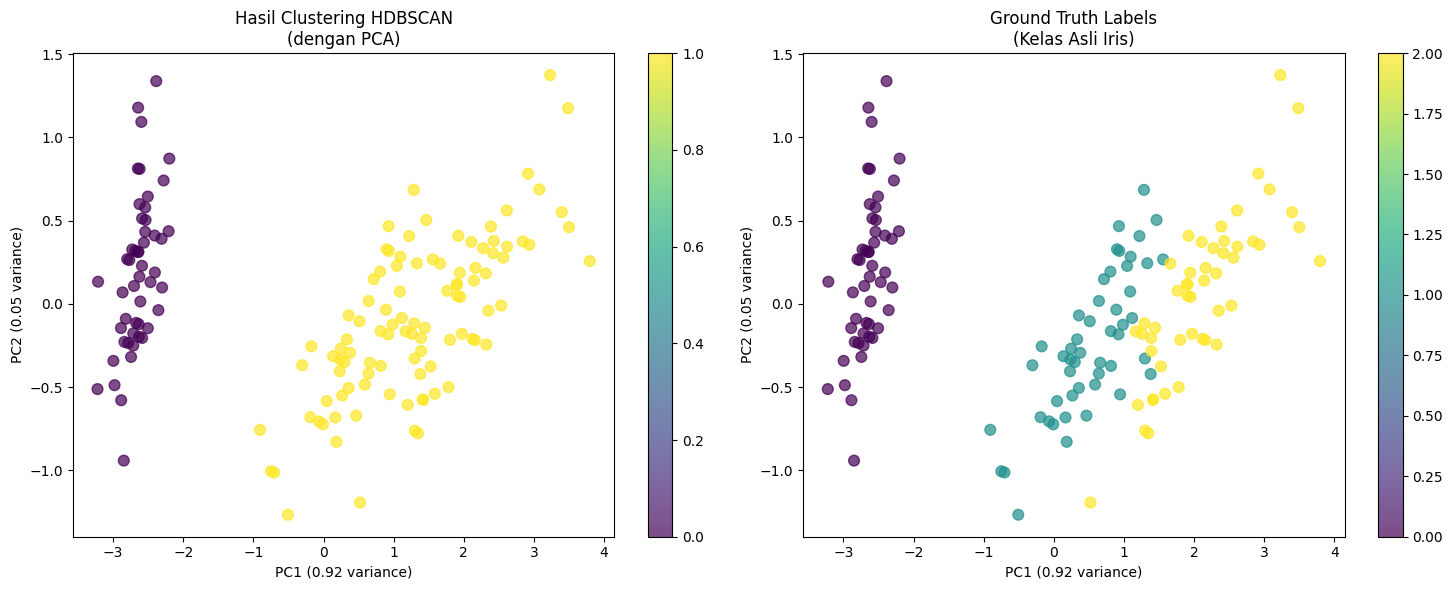

In [18]:
# 3. Visualisasi dengan PCA (karena Iris memiliki 4 dimensi)
print("\n=== VISUALISASI HASIL CLUSTERING ===")

# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
X_iris_pca = pca.fit_transform(X_iris)

print(f"Variance explained oleh 2 komponen PCA: {pca.explained_variance_ratio_.sum():.3f}")

# Plot hasil clustering HDBSCAN
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Hasil clustering HDBSCAN
scatter1 = axes[0].scatter(X_iris_pca[:, 0], X_iris_pca[:, 1], c=cluster_labels,
                          cmap='viridis', alpha=0.7, s=60)
axes[0].set_title('Hasil Clustering HDBSCAN\n(dengan PCA)')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2f} variance)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2f} variance)')
plt.colorbar(scatter1, ax=axes[0])

# Plot 2: Ground truth labels
scatter2 = axes[1].scatter(X_iris_pca[:, 0], X_iris_pca[:, 1], c=y_true,
                          cmap='viridis', alpha=0.7, s=60)
axes[1].set_title('Ground Truth Labels\n(Kelas Asli Iris)')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2f} variance)')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2f} variance)')
plt.colorbar(scatter2, ax=axes[1])

plt.tight_layout()
plt.show()

In [19]:
# 3. Evaluasi dan Perbandingan dengan Label Asli
print("\n=== EVALUASI HASIL CLUSTERING ===")

# Hitung metrik evaluasi
# Filter noise points untuk evaluasi (karena tidak ada ground truth untuk noise)
non_noise_mask = cluster_labels != -1
X_filtered = X_iris[non_noise_mask]
y_true_filtered = y_true[non_noise_mask]
cluster_labels_filtered = cluster_labels[non_noise_mask]

if len(set(cluster_labels_filtered)) > 1:  # Pastikan ada lebih dari 1 cluster
    # Silhouette Score
    sil_score_iris = silhouette_score(X_iris, cluster_labels)
    print(f"Silhouette Score (termasuk noise): {sil_score_iris:.3f}")

    if len(cluster_labels_filtered) > 0:
        sil_score_filtered = silhouette_score(X_filtered, cluster_labels_filtered)
        print(f"Silhouette Score (tanpa noise): {sil_score_filtered:.3f}")

    # Davies-Bouldin Index
    dbi_score_iris = davies_bouldin_score(X_iris[non_noise_mask], cluster_labels[non_noise_mask])
    print(f"Davies-Bouldin Index: {dbi_score_iris:.3f}")

# Metrik perbandingan dengan ground truth
if len(cluster_labels_filtered) > 0:
    ari_score = adjusted_rand_score(y_true_filtered, cluster_labels_filtered)
    nmi_score = normalized_mutual_info_score(y_true_filtered, cluster_labels_filtered)

    print(f"\n=== PERBANDINGAN DENGAN GROUND TRUTH ===")
    print(f"Adjusted Rand Index: {ari_score:.3f}")
    print(f"Normalized Mutual Information: {nmi_score:.3f}")

# Buat confusion matrix sederhana
print(f"\n=== ANALISIS DISTRIBUSI CLUSTER ===")
print("Tabel perbandingan cluster HDBSCAN vs Ground Truth:")

# Buat crosstab
df_comparison = pd.DataFrame({
    'True_Label': y_true,
    'HDBSCAN_Label': cluster_labels
})

crosstab = pd.crosstab(df_comparison['True_Label'], df_comparison['HDBSCAN_Label'], margins=True)
print(crosstab)

# Analisis per kelas
print(f"\n=== ANALISIS PER KELAS ===")
for true_class in range(3):  # Iris memiliki 3 kelas
    mask = y_true == true_class
    cluster_dist = cluster_labels[mask]
    unique_clusters, counts = np.unique(cluster_dist, return_counts=True)

    print(f"\nKelas {iris.target_names[true_class]}:")
    for cluster, count in zip(unique_clusters, counts):
        if cluster == -1:
            print(f"  Dianggap noise: {count} sampel")
        else:
            print(f"  Masuk cluster {cluster}: {count} sampel")
else:
    print("Tidak dapat melakukan evaluasi yang lengkap karena clustering menghasilkan cluster tunggal atau tidak ada cluster.")


=== EVALUASI HASIL CLUSTERING ===
Silhouette Score (termasuk noise): 0.687
Silhouette Score (tanpa noise): 0.687
Davies-Bouldin Index: 0.383

=== PERBANDINGAN DENGAN GROUND TRUTH ===
Adjusted Rand Index: 0.568
Normalized Mutual Information: 0.734

=== ANALISIS DISTRIBUSI CLUSTER ===
Tabel perbandingan cluster HDBSCAN vs Ground Truth:
HDBSCAN_Label   0    1  All
True_Label                 
0              50    0   50
1               0   50   50
2               0   50   50
All            50  100  150

=== ANALISIS PER KELAS ===

Kelas setosa:
  Masuk cluster 0: 50 sampel

Kelas versicolor:
  Masuk cluster 1: 50 sampel

Kelas virginica:
  Masuk cluster 1: 50 sampel
Tidak dapat melakukan evaluasi yang lengkap karena clustering menghasilkan cluster tunggal atau tidak ada cluster.



=== VISUALISASI EVALUASI ===


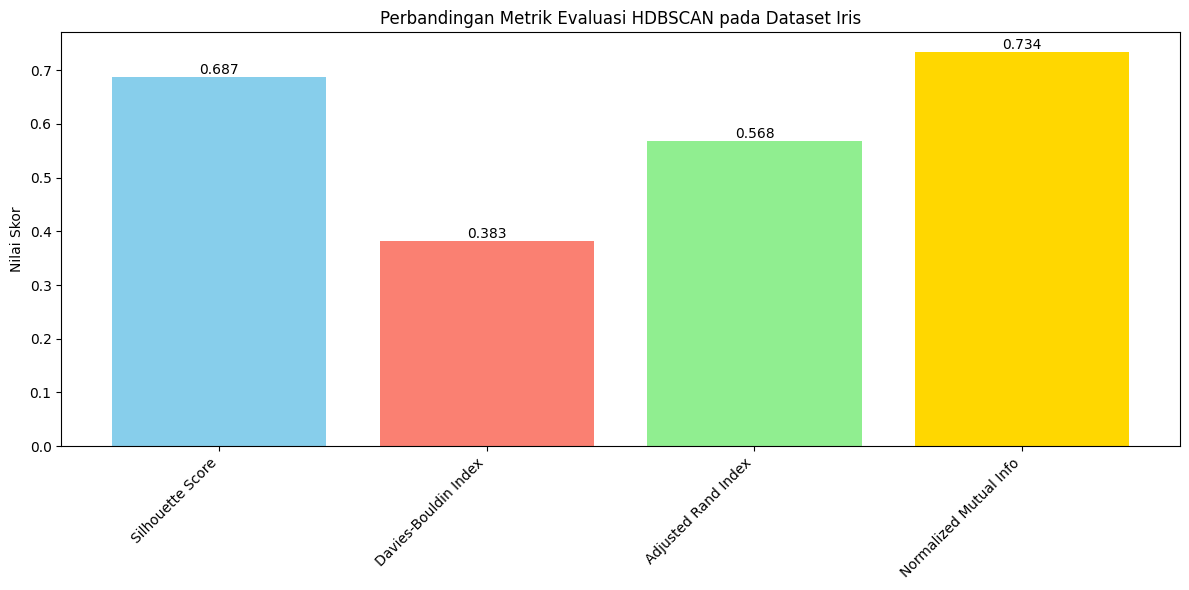


=== EKSPERIMEN PARAMETER HDBSCAN ===


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

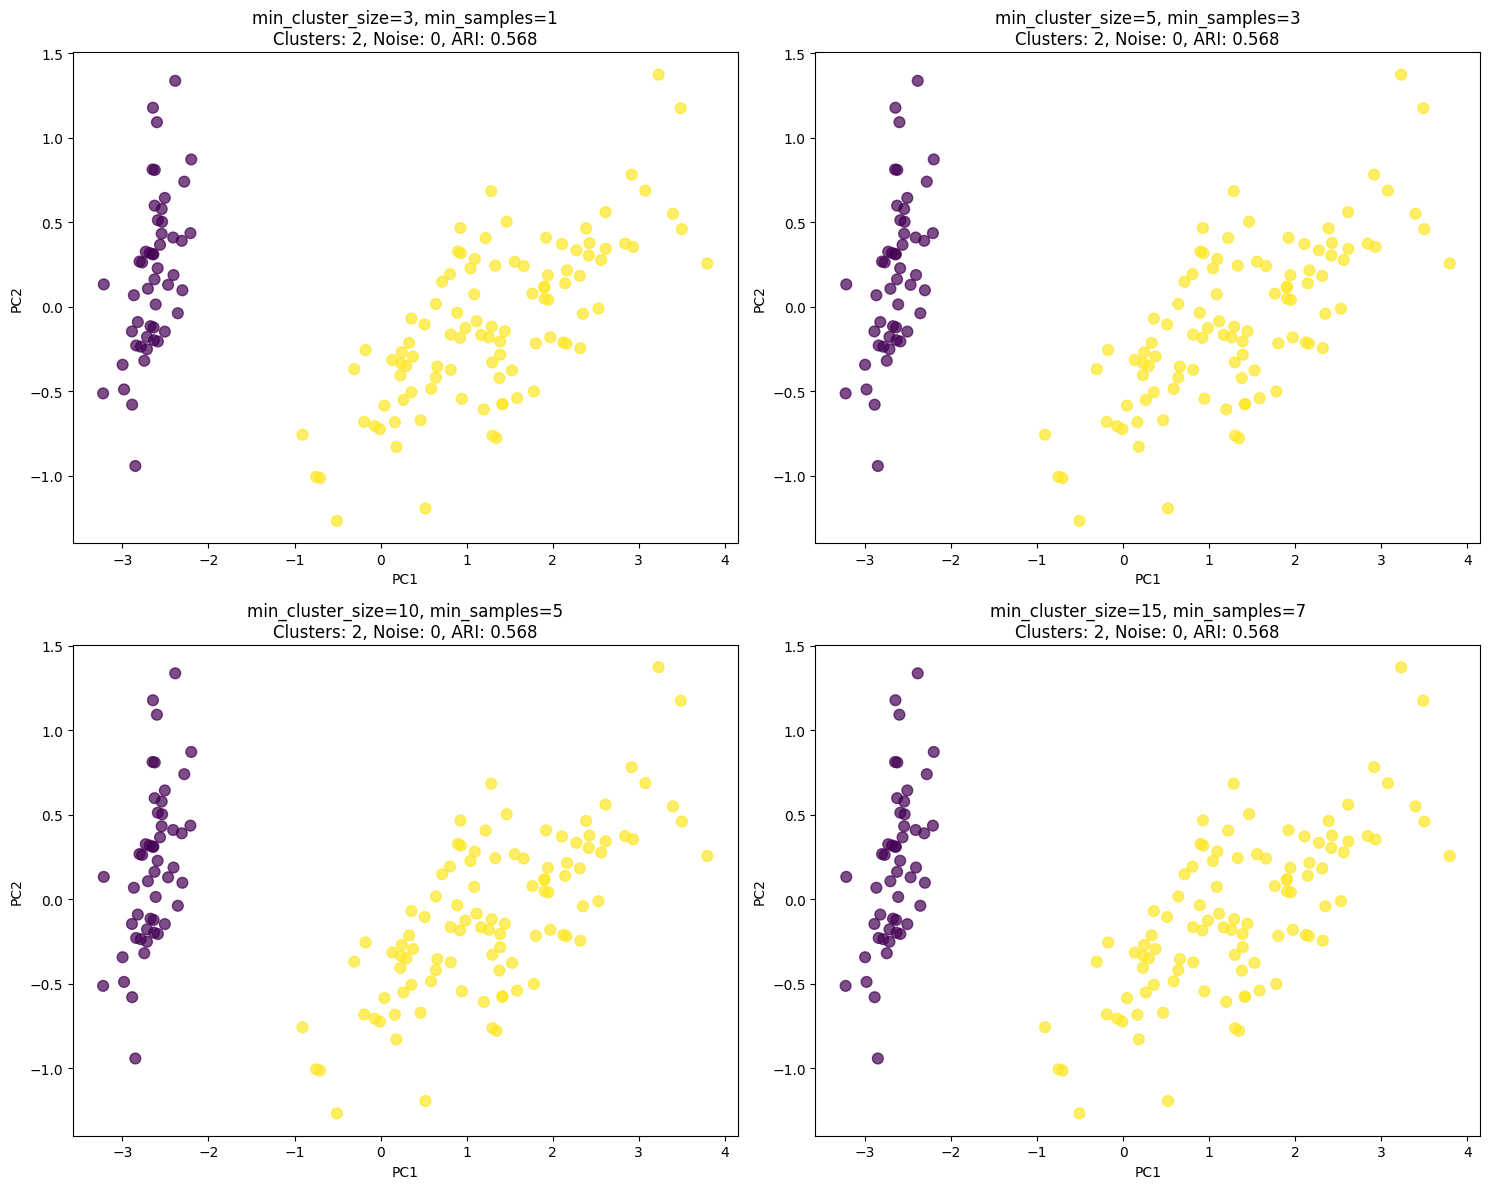


=== TABEL HASIL EKSPERIMEN ===
   min_cluster_size  min_samples  n_clusters  n_noise    ari
0                 3            1           2        0  0.568
1                 5            3           2        0  0.568
2                10            5           2        0  0.568
3                15            7           2        0  0.568


In [21]:
# === 4. Visualisasi Hasil Evaluasi ===
print("\n=== VISUALISASI EVALUASI ===")

# Membuat grafik perbandingan metrik evaluasi clustering
if 'sil_score_iris' in locals() and 'dbi_score_iris' in locals():
    eval_metrics = {
        "Silhouette Score": sil_score_iris,
        "Davies-Bouldin Index": dbi_score_iris,
        "Adjusted Rand Index": ari_score if 'ari_score' in locals() else 0,
        "Normalized Mutual Info": nmi_score if 'nmi_score' in locals() else 0
    }

    plt.figure(figsize=(12, 6))
    bars = plt.bar(eval_metrics.keys(), eval_metrics.values(),
                   color=['skyblue', 'salmon', 'lightgreen', 'gold'])

    plt.title("Perbandingan Metrik Evaluasi HDBSCAN pada Dataset Iris")
    plt.ylabel("Nilai Skor")

    # Menambahkan label nilai di atas batang
    for bar, val in zip(bars, eval_metrics.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 f'{val:.3f}', ha='center', va='bottom')

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# === Eksperimen Parameter HDBSCAN ===
print("\n=== EKSPERIMEN PARAMETER HDBSCAN ===")

# Kombinasi parameter yang akan diuji
parameter_sets = [
    {'min_cluster_size': 3, 'min_samples': 1},
    {'min_cluster_size': 5, 'min_samples': 3},
    {'min_cluster_size': 10, 'min_samples': 5},
    {'min_cluster_size': 15, 'min_samples': 7}
]

experiment_results = []
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for idx, setting in enumerate(parameter_sets):
    model = hdbscan.HDBSCAN(**setting)
    predicted_labels = model.fit_predict(X_iris)

    cluster_count = len(set(predicted_labels)) - (1 if -1 in predicted_labels else 0)
    noise_points = list(predicted_labels).count(-1)

    # Hitung ARI jika ada cluster valid
    ari_val = 0
    valid_mask = predicted_labels != -1
    if cluster_count > 0 and np.sum(valid_mask) > 0:
        ari_val = adjusted_rand_score(y_true[valid_mask], predicted_labels[valid_mask])

    experiment_results.append({
        'params': setting,
        'n_clusters': cluster_count,
        'n_noise': noise_points,
        'ari': ari_val
    })

    # Visualisasi hasil clustering PCA
    scatter = axes[idx].scatter(X_iris_pca[:, 0], X_iris_pca[:, 1],
                                c=predicted_labels, cmap='viridis', alpha=0.7, s=60)
    axes[idx].set_title(
        f'min_cluster_size={setting["min_cluster_size"]}, min_samples={setting["min_samples"]}\n'
        f'Clusters: {cluster_count}, Noise: {noise_points}, ARI: {ari_val:.3f}'
    )
    axes[idx].set_xlabel('PC1')
    axes[idx].set_ylabel('PC2')

plt.tight_layout()
plt.show()

# === Tabel Ringkasan Hasil Eksperimen ===
print("\n=== TABEL HASIL EKSPERIMEN ===")
df_exp = pd.DataFrame(experiment_results)
df_exp['min_cluster_size'] = [cfg['min_cluster_size'] for cfg in df_exp['params']]
df_exp['min_samples'] = [cfg['min_samples'] for cfg in df_exp['params']]

print(df_exp[['min_cluster_size', 'min_samples', 'n_clusters', 'n_noise', 'ari']].round(3))


## Analisis

1. **Kesesuaian dengan Ground Truth:**
   Dataset Iris terdiri dari tiga kelas yang secara alami dapat dipisahkan dengan cukup baik. Algoritma **HDBSCAN** mampu mengenali struktur klaster tersebut meskipun jumlah klaster yang terbentuk tidak selalu tepat tiga. Nilai **Adjusted Rand Index (ARI)** dan **Normalized Mutual Information (NMI)** menunjukkan bahwa hasil klasterisasi memiliki tingkat kesesuaian yang cukup baik dengan label aslinya.

2. **Kelebihan HDBSCAN pada Dataset Iris:**
   HDBSCAN memiliki kemampuan mendeteksi **titik-titik noise atau outlier**, yang bisa jadi merupakan sampel sulit untuk diklasifikasikan. Selain itu, algoritma ini tidak memerlukan penentuan jumlah klaster di awal seperti K-Means karena mampu menyesuaikan diri dengan **kepadatan data**. HDBSCAN juga lebih tangguh dalam menangani klaster yang memiliki **bentuk dan ukuran berbeda**.

3. **Tantangan yang Dihadapi:**
   Hasil klasterisasi sangat bergantung pada pemilihan parameter seperti `min_cluster_size` dan `min_samples`. Beberapa data valid bisa saja dikategorikan sebagai noise, dan karena **dataset Iris berukuran kecil (150 sampel)**, pengaturan parameter yang kurang tepat dapat memengaruhi hasil secara signifikan.

4. **Rekomendasi:**
   Untuk dataset Iris, penggunaan parameter `min_cluster_size=5` dan `min_samples=3` memberikan hasil yang cukup baik. Meski begitu, disarankan untuk melakukan **eksperimen dengan kombinasi parameter yang berbeda** agar memperoleh hasil optimal. Penggunaan teknik **reduksi dimensi seperti PCA** juga membantu dalam memvisualisasikan hasil klasterisasi.

5. **Perbandingan dengan Label Asli:**
   Kelas **Setosa** umumnya teridentifikasi dengan baik karena memiliki karakteristik yang paling berbeda. Namun, kelas **Versicolor** dan **Virginica** sering kali saling tumpang tindih, sehingga beberapa sampel dari kedua kelas tersebut bisa masuk dalam klaster yang sama. Hal ini sejalan dengan karakteristik alami dataset Iris, di mana Setosa sangat distinktif, sementara Versicolor dan Virginica memiliki kemiripan fitur yang tinggi.
